# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, balanced_accuracy_score,f1_score,recall_score,precision_score,classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

%matplotlib inline

# Import Dataset

In [2]:
df = pd.read_csv('df_exam.csv',index_col=0)

# Data Preprocessing - Continued

In [3]:
X = df.drop('Exited',axis=1)
y = df['Exited']

## Scaling

Robust Scaler merupakan algoritma scaling yang tidak sensitif terhadap outlier dan memiliki performa yang umumnya paling baik dari algoritma scaling yang lain oleh karena itu algoritma ini dipilih sebagai media scaling

In [4]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

## Data Splitting

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=42) # 75% merupakan angka terbaik secara teori, penggunaan stratify untuk classification case

## Data Imbalanced Handling - SMOTE

Terdapat 4 cara untuk menghandle imbalanced data pada kasus ini yaitu oversampling, undersampling, SMOTE, dan class weight.<br>
SMOTE dipilih karena metode ini cepat dalam prosesnya

In [6]:
sm = SMOTE(random_state=42)

In [7]:
X_train_sm,y_train_sm=sm.fit_sample(X_train,y_train)

In [9]:
X_train_sm.shape

(11516, 11)

In [10]:
X_train.shape

(7176, 11)

## Logistic Regression

In [11]:
logres = LogisticRegression()
model1 = logres.fit(X_train_sm,y_train_sm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
model1.score(X_test,y_test)

0.7332775919732442

In [13]:
prediksi1 = logres.predict(X_test)

In [14]:
print(classification_report(y_test, prediksi1))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1919
           1       0.40      0.67      0.50       473

    accuracy                           0.73      2392
   macro avg       0.65      0.71      0.66      2392
weighted avg       0.80      0.73      0.76      2392



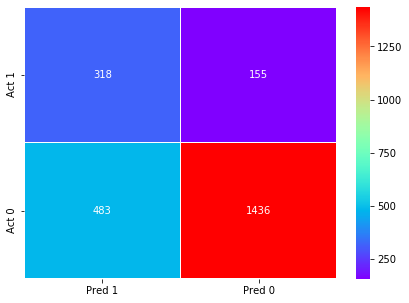

In [18]:
cm1 = confusion_matrix(y_test,prediksi1,labels=[1,0])
df_cm1 = pd.DataFrame(cm1,columns=['Pred 1', 'Pred 0'],index=['Act 1', 'Act 0'])

plt.figure(figsize=(7,5))
x = sns.heatmap(df_cm1, annot=True,annot_kws={'size':10},fmt='d',linewidths=0.2,cmap='rainbow')
x.set_ylim(2,0)
plt.show()

Dalam pemodelan ini, yang menjadi tujuan adalah <b>memprediksi nasabah yang akan berpindah bank</b>. Oleh karena itu pemodelan yang dianggap baik adalah pemodelan yang bisa memberikan nilai True Positive sebanyak-banyaknya dan sebaliknya apabila dalam pemodelan diperoleh False Negative yang banyak maka pemodelan dianggap jelek.<br>

Perlu diingat klasifikasi nasabah yang mirip dengan klasifikasi penyakit pada pasien dimana kesalahan diagnosa bahwa pasien ternyata memiliki penyakit (padahal tidak) lebih baik daripada kesalahan diagnosa bahwa pasien ternyata tidak sakit (padahal sakit)

## Random Forest Classifier

In [20]:
rfc = RandomForestClassifier(n_estimators=100) # n_estimator default
model2 = rfc.fit(X_train_sm,y_train_sm)

In [21]:
model2.score(X_test,y_test)

0.8415551839464883

In [22]:
prediksi2 = rfc.predict(X_test)

In [23]:
print(classification_report(y_test, prediksi2))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1919
           1       0.61      0.54      0.57       473

    accuracy                           0.84      2392
   macro avg       0.75      0.73      0.74      2392
weighted avg       0.84      0.84      0.84      2392



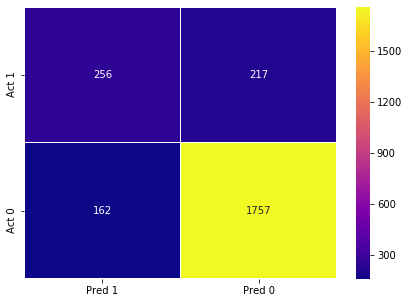

In [24]:
cm2 = confusion_matrix(y_test,prediksi2,labels=[1,0])
df_cm2 = pd.DataFrame(cm2,columns=['Pred 1', 'Pred 0'],index=['Act 1', 'Act 0'])

plt.figure(figsize=(7,5))
x = sns.heatmap(df_cm2, annot=True,annot_kws={'size':10},fmt='d',linewidths=0.2,cmap='plasma')
x.set_ylim(2,0)
plt.show()

Akurasi menggunakan Random Forest Classifier memiliki tingkat akurasi yang lebih baik, namun didapat nilai TP yang lebih kecil dari logistic regression. Walau seperti itu belum bisa diambil kesimpulan yang utuh, harus dibandingkan ROC-AUC nya untuk dapat ditentukan mana pemodelan yang lebih baik.

## XGBoost Classifier

In [25]:
xgbc = XGBClassifier()
model3 = xgbc.fit(X_train_sm,y_train_sm)

In [26]:
model3.score(X_test,y_test)

0.8398829431438127

In [27]:
prediksi3 = xgbc.predict(X_test)

In [28]:
print(classification_report(y_test, prediksi3))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1919
           1       0.59      0.62      0.61       473

    accuracy                           0.84      2392
   macro avg       0.75      0.76      0.75      2392
weighted avg       0.84      0.84      0.84      2392



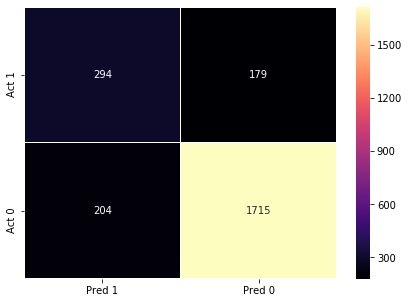

In [29]:
cm3 = confusion_matrix(y_test,prediksi3,labels=[1,0])
df_cm3 = pd.DataFrame(cm3,columns=['Pred 1', 'Pred 0'],index=['Act 1', 'Act 0'])

plt.figure(figsize=(7,5))
x = sns.heatmap(df_cm3, annot=True,annot_kws={'size':10},fmt='d',linewidths=0.2,cmap='magma')
x.set_ylim(2,0)
plt.show()

Akurasi menggunakan XGBoost memiliki tingkat TP yang lebih sedikit dari logistic regression yaitu 294 nasabah. 

# Hyper Parameter Tuning

## Logistic Regression - Tuning

In [37]:
# LogisticRegression()
params1 = {
    "penalty":['l2'], # default l2, l1 dan elasticnet tidak dipakai karena menyebabkan solver 'newton-cg' error
    "solver":['liblinear','newton-cg','sag','saga','lbfgs'], # default liblinear, 'saga' tidak diapakai karena menyebabkan penalty error
    "C":[0.1,0.5,1],
    "max_iter":[100,200,300]
          }

In [38]:
model1_tuning = GridSearchCV(logres, params1, cv=5, n_jobs=-1, verbose=1)
model4 = model1_tuning.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   14.0s finished


In [44]:
model4.score(X_test,y_test)

0.7332775919732442

In [48]:
model4.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

In [45]:
prediksi4 = model4.predict(X_test)

In [46]:
print(classification_report(y_test, prediksi4))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1919
           1       0.40      0.67      0.50       473

    accuracy                           0.73      2392
   macro avg       0.65      0.71      0.66      2392
weighted avg       0.80      0.73      0.76      2392



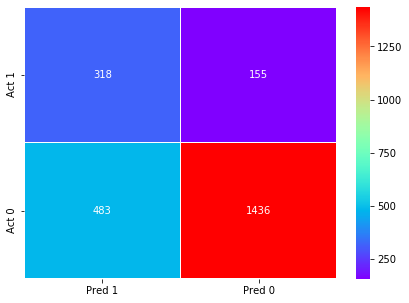

In [47]:
cm4 = confusion_matrix(y_test,prediksi4,labels=[1,0])
df_cm4 = pd.DataFrame(cm4,columns=['Pred 1', 'Pred 0'],index=['Act 1', 'Act 0'])

plt.figure(figsize=(7,5))
x = sns.heatmap(df_cm4, annot=True,annot_kws={'size':10},fmt='d',linewidths=0.2,cmap='rainbow')
x.set_ylim(2,0)
plt.show()

Akurasi menggunakan Logistic Regression dengan Hyper Parameter Tuning memiliki tingkat TP yang tidak berubah dari sebelumnya yaitu 318, sejauh ini Logistic Regression memiliki nilai TP yang terbesar.

## Random Forest Classifier - Tuning

In [61]:
# RandomForestClassifier()
params2 = {
    "n_estimators": [10,100,1000], # default 10
#     "max_features":['auto','sqrt'], # default auto --> di commend karena terlalu lama
    "max_depth":[int(x) for x in np.linspace(10,110,11)], # default none
#     "min_samples_split":[2,5,10], # default 2 --> di commend karena terlalu lama
#     "min_samples_leaf":[1,2,4], # default 1 --> di commend karena terlalu lama
    "bootstrap":[True,False] # default true
          }

In [62]:
model2_tuning = GridSearchCV(rfc, params2, cv=3, n_jobs=-1, verbose=1)
model5 = model2_tuning.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 66 candidates, totalling 198 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed: 11.6min finished


In [63]:
model5.score(X_test,y_test)

0.8448996655518395

In [64]:
model5.best_params_

{'bootstrap': False, 'max_depth': 30, 'n_estimators': 1000}

In [65]:
prediksi5 = model5.predict(X_test)

In [66]:
print(classification_report(y_test, prediksi5))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1919
           1       0.64      0.49      0.56       473

    accuracy                           0.84      2392
   macro avg       0.76      0.71      0.73      2392
weighted avg       0.83      0.84      0.84      2392



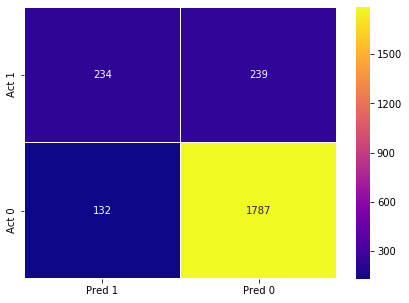

In [73]:
cm5 = confusion_matrix(y_test,prediksi5,labels=[1,0])
df_cm5 = pd.DataFrame(cm5,columns=['Pred 1', 'Pred 0'],index=['Act 1', 'Act 0'])

plt.figure(figsize=(7,5))
x = sns.heatmap(df_cm5, annot=True,annot_kws={'size':10},fmt='d',linewidths=0.2,cmap='plasma')
x.set_ylim(2,0)
plt.show()

Akurasi menggunakan Random Forest Classifier yang telah di tuning memiliki tingkat TP yang paling rendah yaitu 234 nasabah, walaupun akurasinya mencapai 84.4%. 

## XGBoost Classifier - Tuning

In [71]:
# XGBClassifier()
params3 = {
    "learing_rate":[0.1,0.2,0.3], # default 0.1
    "max_depth":[3,5,7],# default 3
    "min_child_weight":[1,2], # default 1
    "gamma":[0.1,0.5], # default 0.1
    "subsample":[0.1,0.5], # default 0.1
    "reg_alpha":[0,1] # default 0
          }
# terdapat beberapa parameter yang dilewat karena sangat memakan waktu

In [72]:
model3_tuning = GridSearchCV(xgbc, params3, cv=3, n_jobs=-1, verbose=1)
model6 = model3_tuning.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  3.6min finished


In [74]:
model6.score(X_test,y_test)

0.8524247491638796

In [75]:
model6.best_params_

{'gamma': 0.1,
 'learing_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'reg_alpha': 1,
 'subsample': 0.5}

In [76]:
prediksi6 = model6.predict(X_test)

In [77]:
print(classification_report(y_test, prediksi6))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1919
           1       0.66      0.53      0.59       473

    accuracy                           0.85      2392
   macro avg       0.77      0.73      0.75      2392
weighted avg       0.84      0.85      0.85      2392



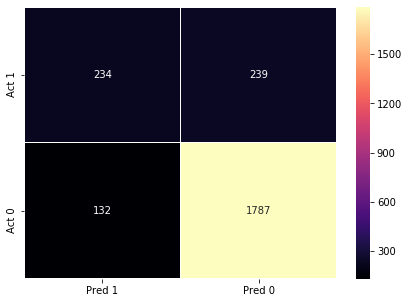

In [78]:
cm6 = confusion_matrix(y_test,prediksi5,labels=[1,0])
df_cm6 = pd.DataFrame(cm6,columns=['Pred 1', 'Pred 0'],index=['Act 1', 'Act 0'])

plt.figure(figsize=(7,5))
x = sns.heatmap(df_cm6, annot=True,annot_kws={'size':10},fmt='d',linewidths=0.2,cmap='magma')
x.set_ylim(2,0)
plt.show()

Akurasi menggunakan XGBoost Classifier yang sudah dituning memiliki tingkat TP yang paling rendah yaitu 234 nasabah (sama seperti RFC), walaupun akurasinya adalah yang tertinggi dari seluruh model 85.2%. 

# ROC - AUC Curve

In [79]:
proba1 = model1.predict_proba(X_test)
proba2 = model2.predict_proba(X_test)
proba3 = model3.predict_proba(X_test)
proba4 = model4.predict_proba(X_test)
proba5 = model5.predict_proba(X_test)
proba6 = model6.predict_proba(X_test)

In [80]:
pred1 = proba1[:,1] 
fpr1, tpr1, threshold1 = roc_curve(y_test, pred1)

pred2 = proba2[:,1] 
fpr2, tpr2, threshold2 = roc_curve(y_test, pred2)

pred3 = proba3[:,1] 
fpr3, tpr3, threshold3 = roc_curve(y_test, pred3)

pred4 = proba4[:,1] 
fpr4, tpr4, threshold4 = roc_curve(y_test, pred4)

pred5 = proba5[:,1] 
fpr5, tpr5, threshold5 = roc_curve(y_test, pred5)

pred6 = proba6[:,1] 
fpr6, tpr6, threshold6 = roc_curve(y_test, pred6)

In [84]:
sc1 = round(auc(fpr1,tpr1),2)
sc2 = round(auc(fpr2,tpr2),2)
sc3 = round(auc(fpr3,tpr3),2)
sc4 = round(auc(fpr4,tpr4),2)
sc5 = round(auc(fpr5,tpr5),2)
sc6 = round(auc(fpr6,tpr6),2)

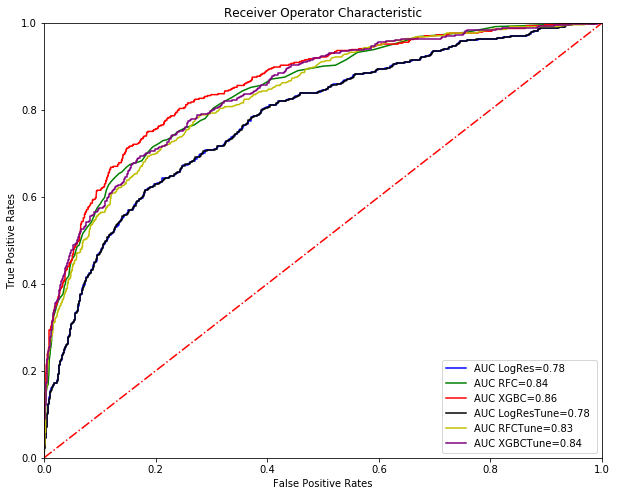

In [85]:
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr1, tpr1, 'b', label=f'AUC LogRes={sc1} ')
plt.plot(fpr2, tpr2, 'g', label=f'AUC RFC={sc2} ')
plt.plot(fpr3, tpr3, 'r', label=f'AUC XGBC={sc3} ')
plt.plot(fpr4, tpr4, 'k', label=f'AUC LogResTune={sc4} ')
plt.plot(fpr5, tpr5, 'y', label=f'AUC RFCTune={sc5} ')
plt.plot(fpr6, tpr6, 'purple', label=f'AUC XGBCTune={sc6} ')

plt.plot([0,1],[0,1],'r-.')

plt.ylim([0,1]) # dizoom grafiknya dari 0.1
plt.xlim([0,1])
plt.legend()
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.show()

Dari perbandingan model diatas, dapat dilihat bahwa model yang paling baik adalah yang memiliki nilai AUC terbesar yaitu XGBC tanpa tuning.<br>
Walaupun pada teori seharusnya tuning dapat mengimprove nilai model, karena terdapat beberapa parameter yang dilewat mengakibatkan nilai tuning yang lebih rendah dari yang tanpa tuning

Oleh karena itu akan dipilih <b>XGBC tanpa tuning</b> sebagai pemodelan terbaik dengan TP 294 nasabah, akurasi 83.9% dan AUC sebesar 0.86

# Export Model

In [86]:
# with open ('bankModel', 'wb') as model:
#     pickle.dump(model3, model)
# di commend agar tidak create double